# Optimizer Example
MNIST RNN example showing comparison between*newer* optimizers.

Richard Henry, 15-Jul-2024

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST RNN
Here we examine optimizers that appeared *after* Adam.

Adapted from Keras Documentation (via Kaggle).
https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 64
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,   #Optimizer
                myClas,   #Number of Outputs
                myShap,   #Input Array Shape
                myBatc,   #Batch Size
                myEpoc,   #Number of Epochs
                myxTra,   #x_train
                myyTra,   #y_train
                myxTes,   #x_test
                myyTes):  #y_test
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(myClas,
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",
                  optimizer=myOpti,
                  metrics=["accuracy"])
    myHis=model.fit(myxTra,
                    myyTra,
                    batch_size=myBatc,
                    epochs=myEpoc,
                    validation_split=0.1)
    score = model.evaluate(myxTes,
                           myyTes,
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, LION

In [7]:
%%time
h0=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7887 - loss: 0.6953 - val_accuracy: 0.8985 - val_loss: 0.3862
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7654 - loss: 0.7747 - val_accuracy: 0.5928 - val_loss: 1.1529
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5005 - loss: 1.4027 - val_accuracy: 0.4890 - val_loss: 1.2908
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.4709 - loss: 1.3901 - val_accuracy: 0.5303 - val_loss: 1.1944
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.4637 - loss: 1.4078 - val_accuracy: 0.5085 - val_loss: 1.2480
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.4518 - loss: 1.4331 - val_accuracy: 0.5127 - val_loss: 1.2690
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4402 - loss: 2.2052 - val_accuracy: 0.3713 - val_loss: 1.6517
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3179 - loss: 1.8024 - 

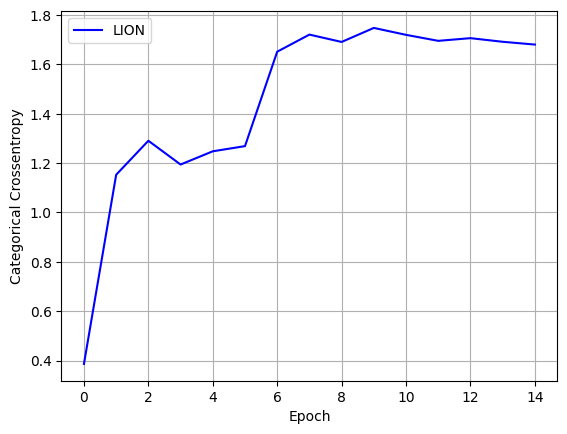

In [8]:
plt.plot(h0.history['val_loss'], color='blue')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

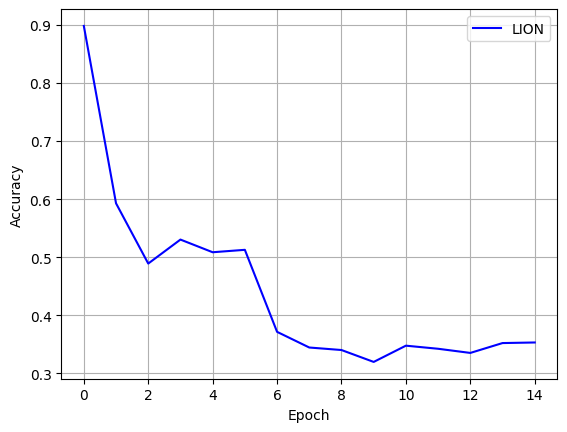

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaFactor

In [10]:
%%time
h1=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5656 - loss: 1.3979 - val_accuracy: 0.9068 - val_loss: 0.3370
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8782 - loss: 0.4106 - val_accuracy: 0.9370 - val_loss: 0.2188
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9135 - loss: 0.2942 - val_accuracy: 0.9485 - val_loss: 0.1722
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9262 - loss: 0.2439 - val_accuracy: 0.9578 - val_loss: 0.1496
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9354 - loss: 0.2131 - val_accuracy: 0.9592 - val_loss: 0.1364
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9427 - loss: 0.1914 - val_accuracy: 0.9622 - val_loss: 0.1298
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9454 - loss: 0.1768 - val_accuracy: 0.9642 - val_loss: 0.1192
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9514 - loss: 0.1603 - 

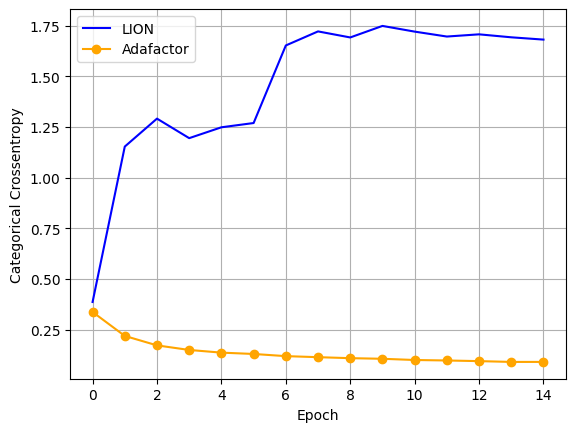

In [11]:
plt.plot(h0.history['val_loss'], color='blue')
plt.plot(h1.history['val_loss'], color='orange',marker='o')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','Adafactor'])
plt.grid()
plt.show()

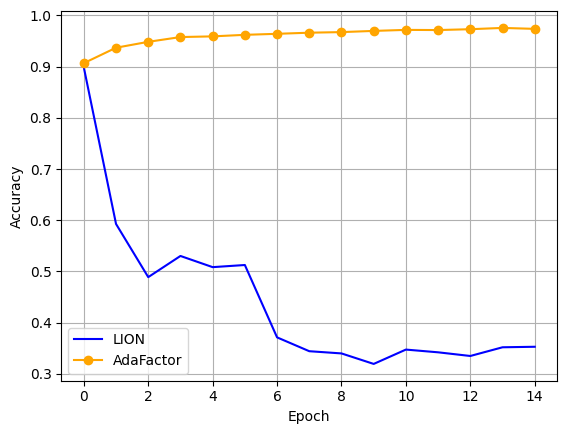

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, Adam + Weight Decay

In [13]:
%%time
h2=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.7708 - loss: 0.7124 - val_accuracy: 0.9478 - val_loss: 0.1635
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9346 - loss: 0.2189 - val_accuracy: 0.9658 - val_loss: 0.1140
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9483 - loss: 0.1765 - val_accuracy: 0.9732 - val_loss: 0.0939
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9584 - loss: 0.1456 - val_accuracy: 0.9715 - val_loss: 0.0977
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9611 - loss: 0.1319 - val_accuracy: 0.9722 - val_loss: 0.0941
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9645 - loss: 0.1204 - val_accuracy: 0.9728 - val_loss: 0.0953
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9653 - loss: 0.1150 - val_accuracy: 0.9727 - val_loss: 0.0953
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9649 - loss: 0.1203 - 

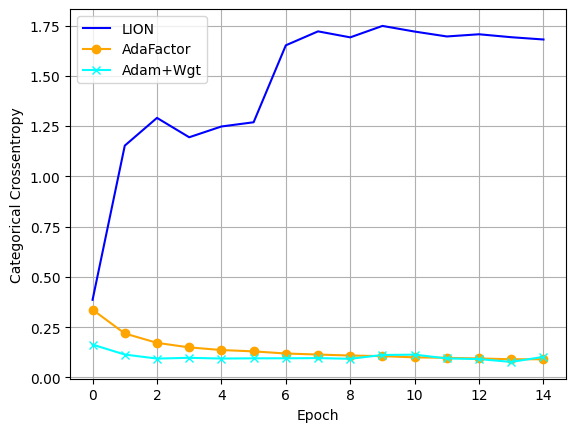

In [14]:
plt.plot(h0.history['val_loss'],color='blue')
plt.plot(h1.history['val_loss'],color='orange',marker='o')
plt.plot(h2.history['val_loss'],color='cyan',marker='x')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

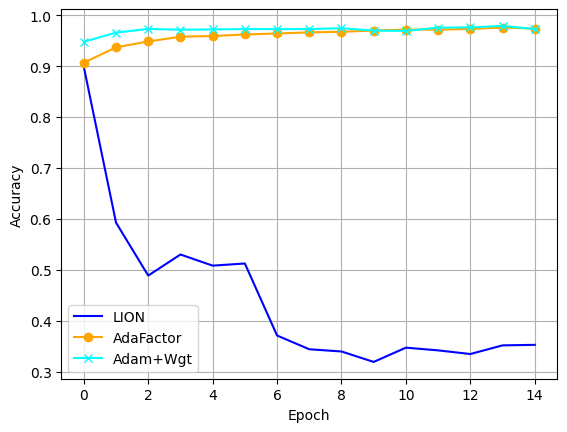

In [15]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Fourth Model, ADAM

In [16]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.7874 - loss: 0.6676 - val_accuracy: 0.9553 - val_loss: 0.1569
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9377 - loss: 0.2139 - val_accuracy: 0.9690 - val_loss: 0.1118
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9500 - loss: 0.1685 - val_accuracy: 0.9648 - val_loss: 0.1238
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9573 - loss: 0.1445 - val_accuracy: 0.9700 - val_loss: 0.1046
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9612 - loss: 0.1311 - val_accuracy: 0.9702 - val_loss: 0.1104
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9627 - loss: 0.1268 - val_accuracy: 0.9697 - val_loss: 0.1083
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9653 - loss: 0.1181 - val_accuracy: 0.9742 - val_loss: 0.0946
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9673 - loss: 0.1110 - val_accuracy:

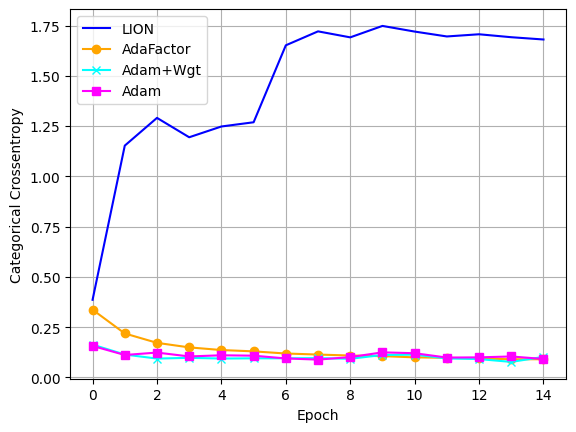

In [17]:
plt.plot(h0.history['val_loss'],color='blue')
plt.plot(h1.history['val_loss'],color='orange',marker='o')
plt.plot(h2.history['val_loss'],color='cyan',marker='x')
plt.plot(h3.history['val_loss'],color='magenta',marker='s')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

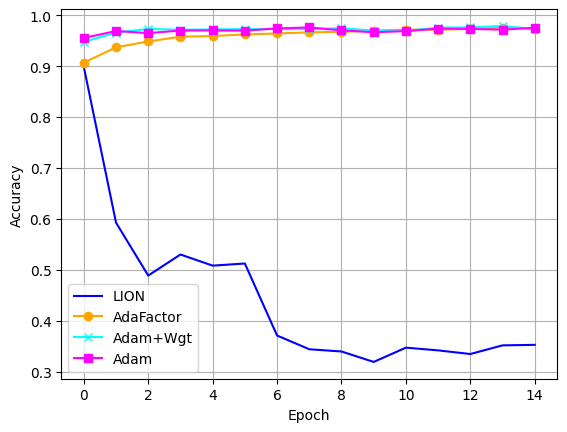

In [18]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.plot(h3.history['val_accuracy'],color='magenta',marker='s')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

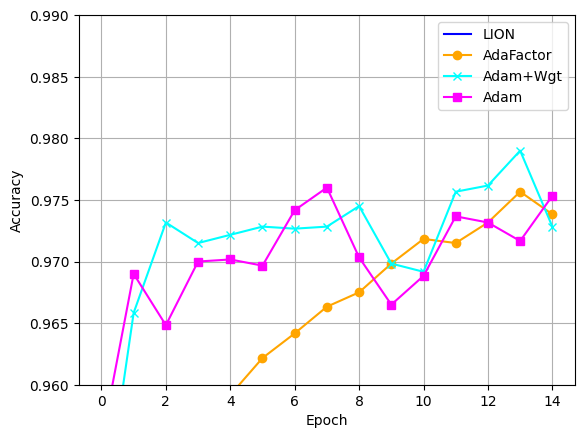

In [19]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.plot(h3.history['val_accuracy'],color='magenta',marker='s')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.ylim([0.96,0.99])
plt.show()

#### Commentary
Lorem Ipsum
# Conclusions
Blah blah blah